In [8]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn import datasets 
import csv
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from itertools import permutations, combinations
from sklearn.utils import resample
from sklearn import preprocessing
from sklearn.grid_search import GridSearchCV
from sklearn import datasets, svm
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import matplotlib


In [9]:
#Import data
input_file_path = 'Churn.csv'
data = pd.read_csv(input_file_path)
col_obj = data.select_dtypes(include = ['object'])
col_obj_ = col_obj.drop('customerID', axis=1)
col_num= data.select_dtypes(include = [np.number])

#Pre-processing data
le = preprocessing.LabelEncoder()
col_obj__ = col_obj_.apply(le.fit_transform)
processed_data = pd.concat([col_obj__,col_num], axis =1)
print(processed_data)

      gender  Partner  Dependents  PhoneService  MultipleLines  \
0          0        1           0             0              1   
1          1        0           0             1              0   
2          1        0           0             1              0   
3          1        0           0             0              1   
4          0        0           0             1              0   
5          0        0           0             1              2   
6          1        0           1             1              2   
7          0        0           0             0              1   
8          0        1           0             1              2   
9          1        0           1             1              0   
10         1        1           1             1              0   
11         1        0           0             1              0   
12         1        1           0             1              2   
13         1        0           0             1              2   
14        

In [10]:
# Choosing Features according to their co-relation with Target-Feature

# columns.var()
x = processed_data.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
#print(df)
plt.savefig('mytable.png')
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.000000,-0.001808,0.010517,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.005291,-0.008612,-0.001874,0.005106,-0.014569
1,-0.001808,1.000000,0.452676,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.059568,-0.150448,0.016479,0.379697,0.096848
2,0.010517,0.452676,1.000000,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.009572,-0.164221,-0.211185,0.159712,-0.113890
3,-0.006488,0.017706,-0.001762,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.083195,0.011942,0.008576,0.008448,0.247398
4,-0.006739,0.142410,-0.024991,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.114955,0.038037,0.146185,0.343032,0.433576
5,-0.000863,0.000891,0.044590,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.055724,-0.047291,-0.032310,-0.030359,-0.323260
6,-0.015017,0.150828,0.152166,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,0.042357,-0.289309,-0.128221,0.325468,-0.053878
7,-0.012057,0.153130,0.091015,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.090756,-0.195525,-0.013632,0.370876,0.119777
8,0.000549,0.166330,0.080537,0.003727,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.350277,-0.038234,-0.135750,0.105905,-0.178134,-0.021398,0.371105,0.163652
9,-0.006825,0.126733,0.133524,-0.019158,0.011466,-0.026047,0.285028,0.195748,0.240593,1.000000,0.161305,0.161316,0.425367,-0.113600,-0.104670,0.057488,-0.282492,-0.151268,0.322942,-0.008682


In [11]:
#Chosen Features
preferred_columns_ = [    'MonthlyCharges',  'PaperlessBilling',  'OnlineBackup',  'TechSupport', 'OnlineSecurity', 'tenure', 'Contract']      
preferred_columns = [    'MonthlyCharges' ,'PaperlessBilling',  'OnlineBackup', 'TechSupport','OnlineSecurity', 'tenure']

#Target feature
y = processed_data.Churn


columns = processed_data[preferred_columns]
columns_ = processed_data[preferred_columns_]

#Trying out all combinations of selected features 
possible_features_comb = []
for i in range (0,8):
    possible_features_comb.append(list(combinations(columns_, i)))
    


In [18]:
store_holdout_svm = []

In [20]:
#Holdout with random sampling for SVM 
for i in range(5):
    for item in possible_features_comb[i]:
        X = columns_
        for j in range(i):
            X = X.drop([item[j]], axis = 1)

        SVMModel = svm.SVC(C=10, kernel='rbf', gamma=0.0001)
        data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(X, y,test_size= .4,random_state = 0)
        SVMModel.fit(data_X_train, data_y_train)
        label = SVMModel.predict(data_X_test)
        store_holdout_svm.append( 1-metrics.accuracy_score(data_y_test, label))
        
print(store_holdout_svm)

[0.2143364088005678, 0.21682044002838896, 0.2143364088005678, 0.21256210078069548, 0.21256210078069548, 0.2143364088005678, 0.26508161816891407, 0.2143364088005678, 0.223207948899929, 0.22249822569198008, 0.2331440738112136, 0.23775727466288143, 0.26508161816891407, 0.2193044712562101, 0.21362668559261888, 0.21256210078069548, 0.2154009936124911, 0.26508161816891407, 0.21504613200851663, 0.2114975159687722, 0.21291696238466995, 0.26508161816891407, 0.21220723917672113, 0.21291696238466995, 0.26508161816891407, 0.21220723917672113, 0.26508161816891407, 0.21398154719659335, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.2381121362668559, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.26508161816891407, 0.21185237757274666, 0.21469127040454228, 0.26508161816891407, 0.21256210078069548, 0.

0.2114975159687722


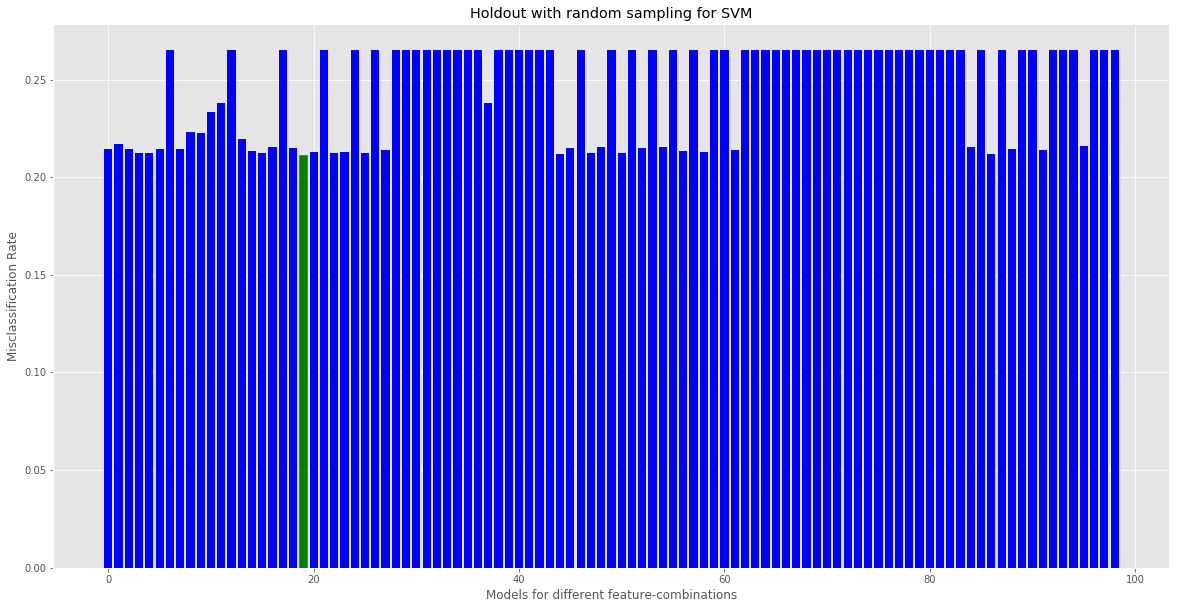

In [21]:

accuracy = store_holdout_svm

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Holdout with random sampling for SVM')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_holdout_svm.png')
plt.show()



In [22]:
store_holdout_lgr = []

In [23]:
#Holdout with random sampling for LogisticRegression

for i in range(7):
    for item in possible_features_comb[i]:
        X = columns_
        for j in range(i):
            X = X.drop([item[j]], axis = 1)

        
        data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(X, y,test_size= .4,random_state = 0)
        
        
        
        logreg = LogisticRegression()

        # fit model
        logreg.fit(data_X_train, data_y_train)
        label = logreg.predict(data_X_test)
        store_holdout_lgr.append(1-metrics.accuracy_score(data_y_test, label))
        
print(store_holdout_lgr)

[0.2004968062455642, 0.21469127040454228, 0.20901348474095105, 0.20475514549325768, 0.2075940383250532, 0.21007806955287434, 0.230305180979418, 0.2065294535131299, 0.22746628814762238, 0.21398154719659335, 0.21894960965223564, 0.22285308729595454, 0.2313697657913414, 0.2164655784244145, 0.20865862313697658, 0.21362668559261888, 0.21611071682044003, 0.22995031937544352, 0.20901348474095105, 0.20475514549325768, 0.21078779276082327, 0.22178850248403126, 0.20120652945351314, 0.21362668559261888, 0.2292405961674947, 0.20440028388928322, 0.23207948899929032, 0.2075940383250532, 0.24166075230660045, 0.21753016323633778, 0.23278921220723914, 0.23385379701916253, 0.23953158268275376, 0.2214336408800568, 0.2193044712562101, 0.22249822569198008, 0.223207948899929, 0.21291696238466995, 0.24343506032647266, 0.23669268985095815, 0.21753016323633778, 0.23953158268275376, 0.22072391767210786, 0.23882185947480483, 0.21220723917672113, 0.21362668559261888, 0.2242725337118524, 0.20865862313697658, 0.222

0


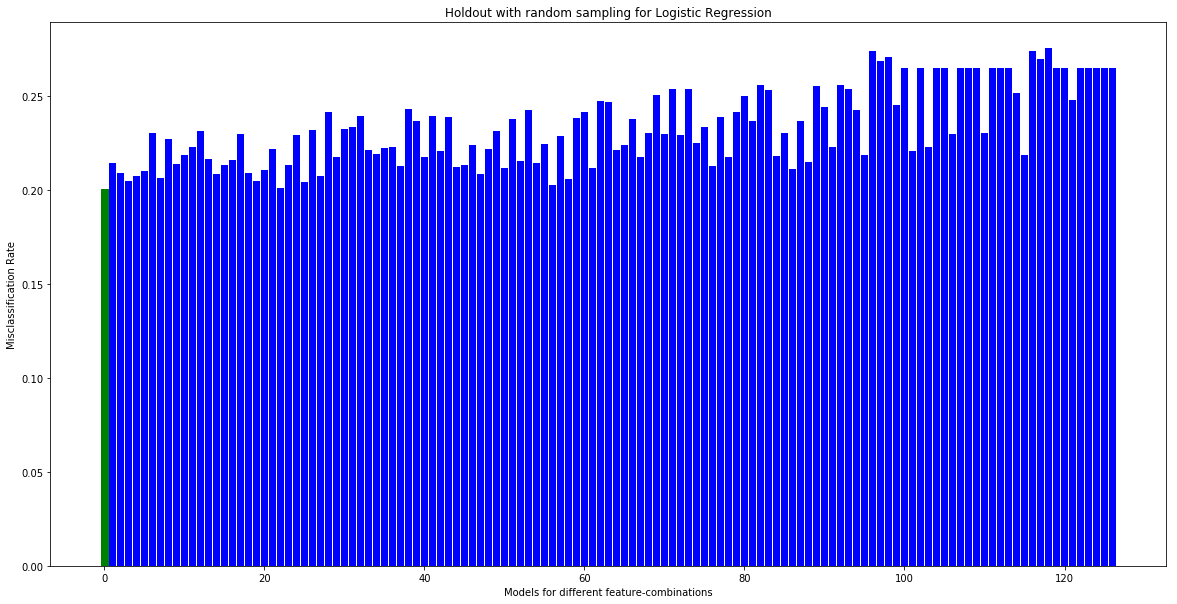

In [24]:

accuracy = store_holdout_lgr

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Holdout with random sampling for Logistic Regression')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(index_min)
plt.savefig('Ass2_holdout_lgr.png')
plt.show()



In [25]:
store_holdout_n = []

In [26]:
#Holdout with random sampling for K-NeighborsClassifier

for i in range(7):
    for item in possible_features_comb[i]:
        X = columns_
        for j in range(i):
            X = X.drop([item[j]], axis = 1)

        
        data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(X, y,test_size= .4,random_state = 0)
        
        
        
        neigh = KNeighborsClassifier(n_neighbors=3)

        # fit model
        neigh.fit(data_X_train, data_y_train)
        label = neigh.predict(data_X_test)
        store_holdout_n.append(1-metrics.accuracy_score(data_y_test, label))
        
print(store_holdout_n)





[0.23456352022711147, 0.25621007806955287, 0.23172462739531585, 0.23740241305890708, 0.24024130589070258, 0.24059616749467705, 0.25621007806955287, 0.23456352022711147, 0.2867281760113556, 0.24272533711852373, 0.25230660042583397, 0.2569198012775018, 0.29808374733853793, 0.2579843860894251, 0.23491838183108593, 0.2381121362668559, 0.23491838183108593, 0.25940383250532295, 0.23278921220723914, 0.24166075230660045, 0.24095102909865151, 0.2679205110007097, 0.23704755145493261, 0.2441447835344216, 0.2636621717530163, 0.24166075230660045, 0.26046841731724624, 0.24130589070262598, 0.27998580553584107, 0.2519517388218595, 0.24733853797019167, 0.2817601135557133, 0.2775017743080199, 0.28779276082327887, 0.27537260468417313, 0.2537260468417317, 0.2739531582682754, 0.24840312278211496, 0.25159687721788504, 0.29879347054648686, 0.2530163236337828, 0.28105039034776436, 0.2569198012775018, 0.3129879347054648, 0.2381121362668559, 0.23349893541518807, 0.2668559261887864, 0.23669268985095815, 0.240951

0.23172462739531585


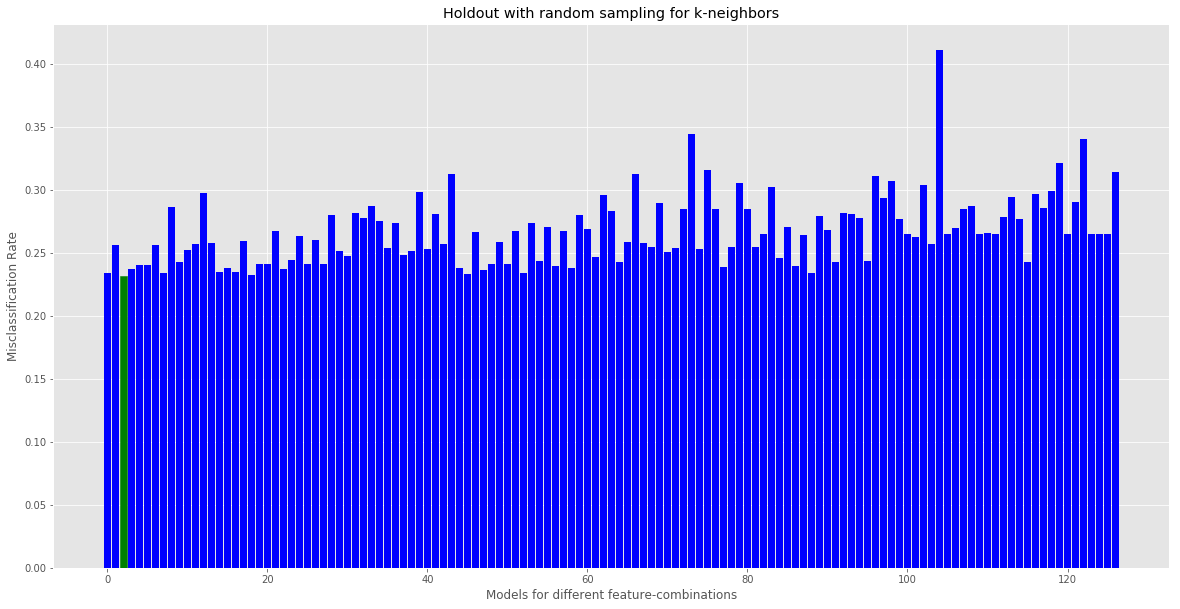

In [27]:

accuracy = store_holdout_n

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Holdout with random sampling for k-neighbors')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_holdout_neigh.png')
plt.show()



In [28]:
store_holdout_strat_svm = []

In [29]:
#Stratified Holdout for SVM


data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(columns_ , y, test_size = .4, stratify=data['Churn'],random_state = 0)

for i in range(5):
     for item in possible_features_comb[i]:
            train_X = data_X_train
            test_X = data_X_test
            for j in range(i):
                train_X = train_X.drop([item[j]], axis = 1)
                test_X = test_X.drop([item[j]], axis = 1)
                
            SVMModel = svm.SVC(C=10, kernel='rbf', gamma=0.0001)
            
            SVMModel.fit(train_X, data_y_train)
            label = SVMModel.predict(test_X)
            store_holdout_strat_svm.append(1-metrics.accuracy_score(data_y_test, label))
            

print(store_holdout_strat_svm)
            

[0.20688431511710437, 0.230305180979418, 0.20617459190915544, 0.20794889992902765, 0.20688431511710437, 0.2075940383250532, 0.26543647977288853, 0.20830376153300212, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.20617459190915544, 0.20581973030518097, 0.2075940383250532, 0.26543647977288853, 0.20581973030518097, 0.2065294535131299, 0.20865862313697658, 0.26543647977288853, 0.2065294535131299, 0.20830376153300212, 0.26543647977288853, 0.2065294535131299, 0.26543647977288853, 0.2065294535131299, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.26543647977288853, 0.20688431511710437, 0.20901348474095105, 0.26543647977288853, 0.2065294535131299, 

0.20581973030518097


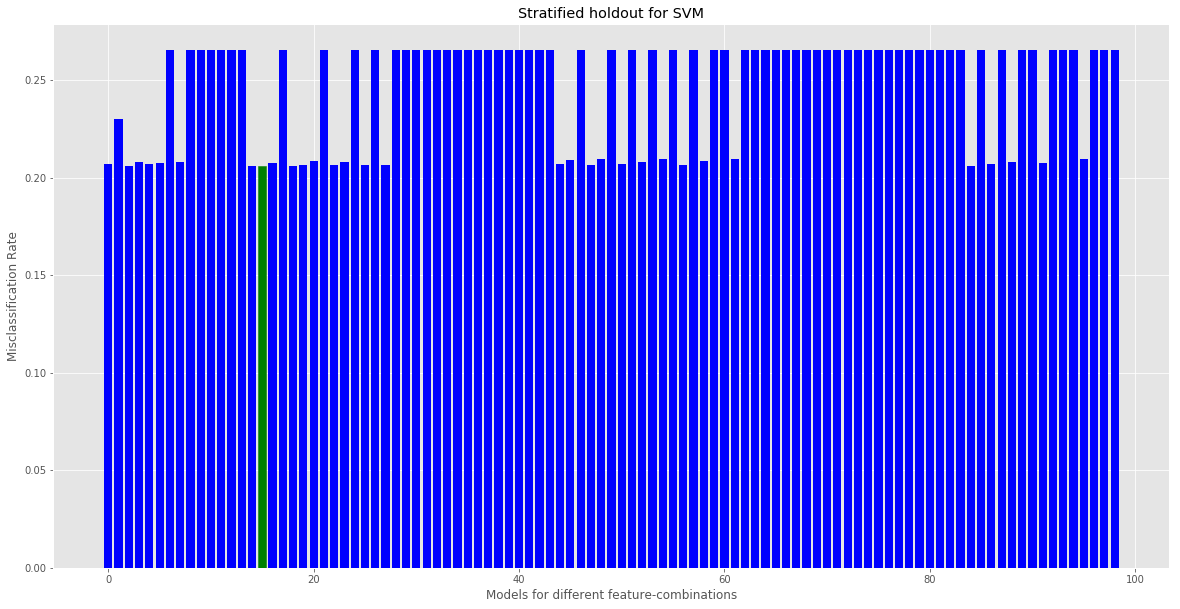

In [30]:

accuracy = store_holdout_strat_svm

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified holdout for SVM')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_strt_svm.png')
plt.show()



In [25]:
store_holdout_strat_lgr = []

In [26]:
#Stratified Holdout for Logistic Regression


data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(columns_ , y, test_size = .4, stratify=data['Churn'],random_state = 0)

for i in range(7):
     for item in possible_features_comb[i]:
            train_X = data_X_train
            test_X = data_X_test
            for j in range(i):
                train_X = train_X.drop([item[j]], axis = 1)
                test_X = test_X.drop([item[j]], axis = 1)
                
            logreg = LogisticRegression()

            # fit model
            logreg.fit(train_X, data_y_train)
            label = logreg.predict(test_X)
            store_holdout_strat_lgr.append(1-metrics.accuracy_score(data_y_test, label))
            

print(store_holdout_strat_lgr)
            

[0.20865862313697658, 0.22391767210787794, 0.20794889992902765, 0.20794889992902765, 0.21078779276082327, 0.20440028388928322, 0.22782114975159684, 0.20901348474095105, 0.22391767210787794, 0.22569198012775016, 0.22072391767210786, 0.2264017033356991, 0.23491838183108593, 0.2242725337118524, 0.20865862313697658, 0.21291696238466995, 0.2104329311568488, 0.23562810503903475, 0.20723917672107883, 0.20972320794889998, 0.20511000709723204, 0.2331440738112136, 0.20617459190915544, 0.2065294535131299, 0.23846699787083037, 0.20794889992902765, 0.23385379701916253, 0.21078779276082327, 0.23704755145493261, 0.223207948899929, 0.223207948899929, 0.223207948899929, 0.23349893541518807, 0.22072391767210786, 0.2242725337118524, 0.22746628814762238, 0.23491838183108593, 0.22462739531582687, 0.23598296664300922, 0.23775727466288143, 0.22001419446415893, 0.23846699787083037, 0.223207948899929, 0.23846699787083037, 0.21753016323633778, 0.2114975159687722, 0.22995031937544352, 0.21007806955287434, 0.2178

0.20440028388928322


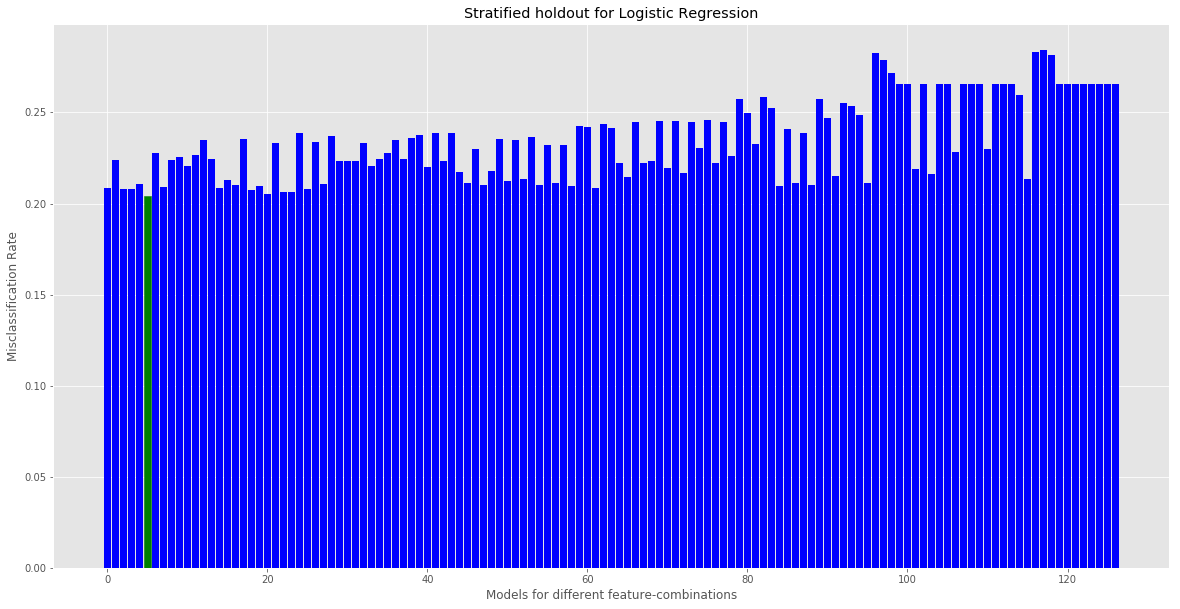

In [28]:

accuracy = store_holdout_strat_lgr

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified holdout for Logistic Regression')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_strat_lgr.png')
plt.show()



0.20440028388928322


In [34]:
store_holdout_strat_n = []

In [35]:
#Stratified holdout for k-neighbors


data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(columns_ , y, test_size = .4, stratify=data['Churn'],random_state = 0)

for i in range(7):
     for item in possible_features_comb[i]:
            train_X = data_X_train
            test_X = data_X_test
            for j in range(i):
                train_X = train_X.drop([item[j]], axis = 1)
                test_X = test_X.drop([item[j]], axis = 1)
                
            neigh = KNeighborsClassifier(n_neighbors=3)

        

            # fit model
            neigh.fit(train_X, data_y_train)
            label = neigh.predict(test_X)
            store_holdout_strat_n.append(1-metrics.accuracy_score(data_y_test, label))
            

print(store_holdout_strat_n)
            

[0.24520936834634488, 0.2725337118523776, 0.24378992193044713, 0.2430801987224982, 0.24875798438608943, 0.25443577004968065, 0.2537260468417317, 0.2420156139105749, 0.2718239886444287, 0.2526614620298083, 0.2625975869410929, 0.26437189496096525, 0.26330731014904185, 0.2735982966643009, 0.2491128459900639, 0.2512420156139106, 0.2519517388218595, 0.2700496806245565, 0.24378992193044713, 0.2430801987224982, 0.25656493967352734, 0.26011355571327177, 0.24059616749467705, 0.2501774308019872, 0.25727466288147627, 0.24449964513839606, 0.26153300212916963, 0.24946770759403836, 0.272888573456352, 0.25443577004968065, 0.2647267565649397, 0.25337118523775726, 0.2757274662881476, 0.27821149751596874, 0.2569198012775018, 0.24946770759403836, 0.2764371894960965, 0.2501774308019872, 0.2459190915542938, 0.26330731014904185, 0.269694819020582, 0.28317955997161104, 0.26543647977288853, 0.3882185947480482, 0.2491128459900639, 0.25621007806955287, 0.272888573456352, 0.2501774308019872, 0.25053229240596164,

0.23633782824698368


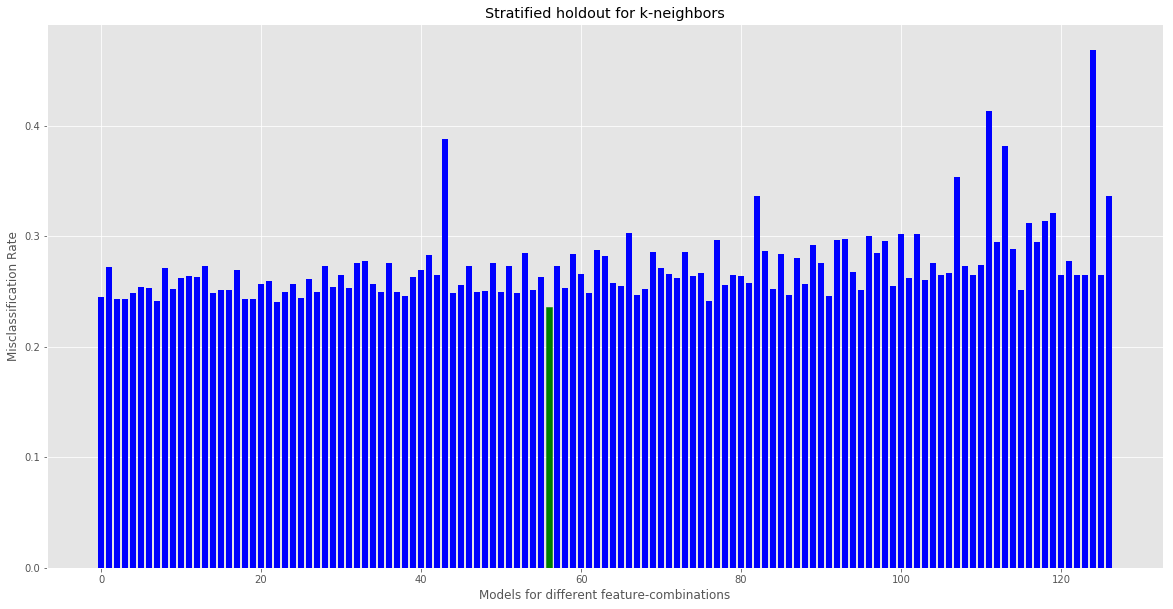

In [36]:

accuracy = store_holdout_strat_n

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified holdout for k-neighbors')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_strat_neigh.png')
plt.show()



In [37]:
  store_kfold_n = []

In [38]:
#Kfold stratified for K-neighbors


for i in range(7):
     for item in possible_features_comb[i]:
            X = columns_
            
            kf = StratifiedKFold(n_splits=10)
            err = np.empty(10)
            for k, (train, test) in enumerate(kf.split(processed_data, y)):
                
                for j in range(i):
                    X = X.drop([item[j]], axis = 1)
                
                data_X_train = X.iloc[train]
                data_y_train = y.iloc[train]
                
                data_X_test = X.iloc[test]
                data_y_test = y.iloc[test]
                neigh = KNeighborsClassifier(n_neighbors=3)
                
                neigh.fit(data_X_train, data_y_train)
                label = neigh.predict(data_X_test)
                err[k] = 1-metrics.accuracy_score(data_y_test, label)
                X = columns_
                
            store_kfold_n.append(np.average(err))
            
            
print(store_kfold_n)

[0.24038129738717648, 0.2646658458889002, 0.23782568924926148, 0.24449759504490748, 0.24520560657878687, 0.2427976836973898, 0.25542966647039994, 0.2423665079680617, 0.2744589160574603, 0.2524491251342455, 0.2562795150974042, 0.2613981971320297, 0.27657852491349133, 0.2676459779539287, 0.23952741566263405, 0.2406631765698815, 0.24194178485086942, 0.2640883970030806, 0.24052354776388932, 0.24932412226820122, 0.23966804672431774, 0.26253194607617897, 0.24350347719958582, 0.2442127010702039, 0.25642903032320724, 0.24406883711055044, 0.26551147025321153, 0.24535127757937109, 0.2738897434477642, 0.25798829341277546, 0.26792744270662805, 0.27275436945649706, 0.27771246158354224, 0.2764445307505918, 0.26848856861034914, 0.2561410992013596, 0.25160230219020807, 0.2595487780104242, 0.2673582586327547, 0.27516128320369637, 0.2642270132356218, 0.27872432081628606, 0.2614000116246757, 0.2745965432181138, 0.24392982192464271, 0.239668252219694, 0.26409121776388006, 0.24109011714554832, 0.2456293285

0.23782568924926148


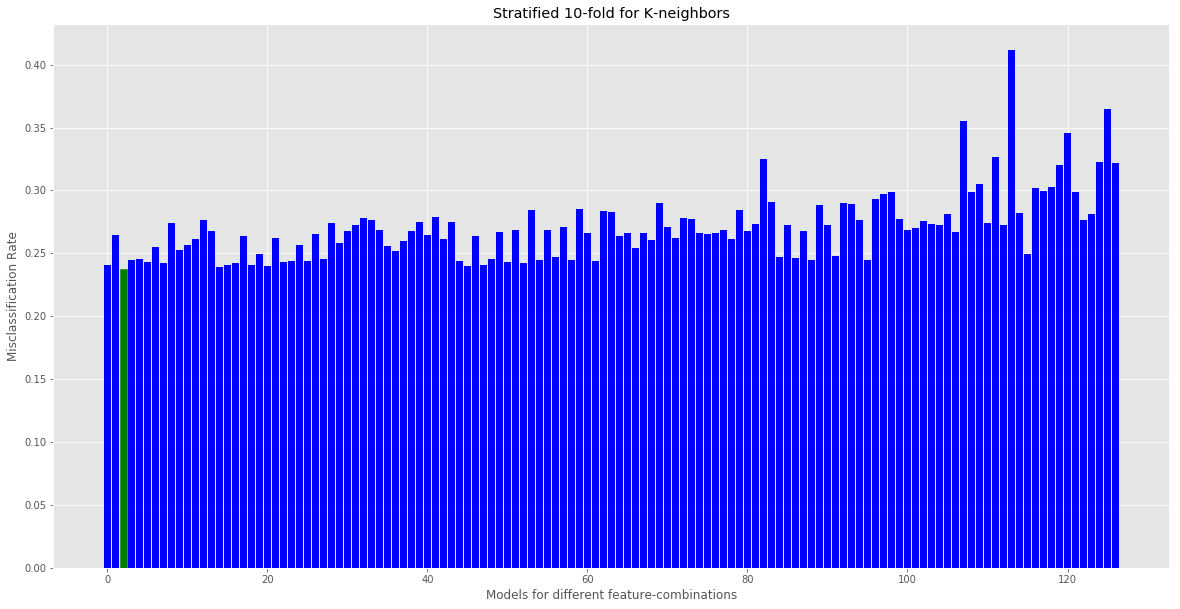

In [39]:

accuracy = store_kfold_n

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified 10-fold for K-neighbors')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_k_neih.png')
plt.show()



In [40]:
  store_kfold_svm = []

In [41]:
#Kfold stratified for SVM


for i in range(4):
     for item in possible_features_comb[i]:
            X = columns_
            
            kf = StratifiedKFold(n_splits=10)
            err = np.empty(10)
            for k, (train, test) in enumerate(kf.split(processed_data, y)):
                
                for j in range(i):
                    X = X.drop([item[j]], axis = 1)
                
                data_X_train = X.iloc[train]
                data_y_train = y.iloc[train]
                
                data_X_test = X.iloc[test]
                data_y_test = y.iloc[test]
                SVMModel = svm.SVC(C=10, kernel='rbf', gamma=0.0001)
                
                SVMModel.fit(data_X_train, data_y_train)
                label = SVMModel.predict(data_X_test)
                err[k] = 1-metrics.accuracy_score(data_y_test, label)
                X = columns_
                
            store_kfold_svm.append(np.average(err))
            
            
print(store_kfold_svm)

[0.20971256298418953, 0.21865417495526676, 0.2101389008307401, 0.2101382958087885, 0.21027933327555387, 0.21099077173860206, 0.26536982776449464, 0.20999685537619467, 0.22348311825390493, 0.2195068477823237, 0.22263165719037778, 0.22561420877000385, 0.26536982776449464, 0.2163840663872159, 0.21028034240975169, 0.21070587375143646, 0.21127466173798762, 0.26536982776449464, 0.2099970568591089, 0.21098956112148998, 0.21113261571023326, 0.26536982776449464, 0.21084812068889613, 0.21169958748451193, 0.26536982776449464, 0.20999564533229145, 0.26536982776449464, 0.21042299288624874, 0.26536982776449464, 0.22504864451008064, 0.25074901860911103, 0.2551459802467641, 0.26536982776449464, 0.22589870149850552, 0.23257808050466228, 0.2349908384027925, 0.26536982776449464, 0.22050318939141725, 0.2612505095826765, 0.26536982776449464, 0.23370596752840597, 0.26536982776449464, 0.23896529036926575, 0.26536982776449464, 0.21113160657603544, 0.21226877843689157, 0.26536982776449464, 0.21084892776697087,

0.20971256298418953


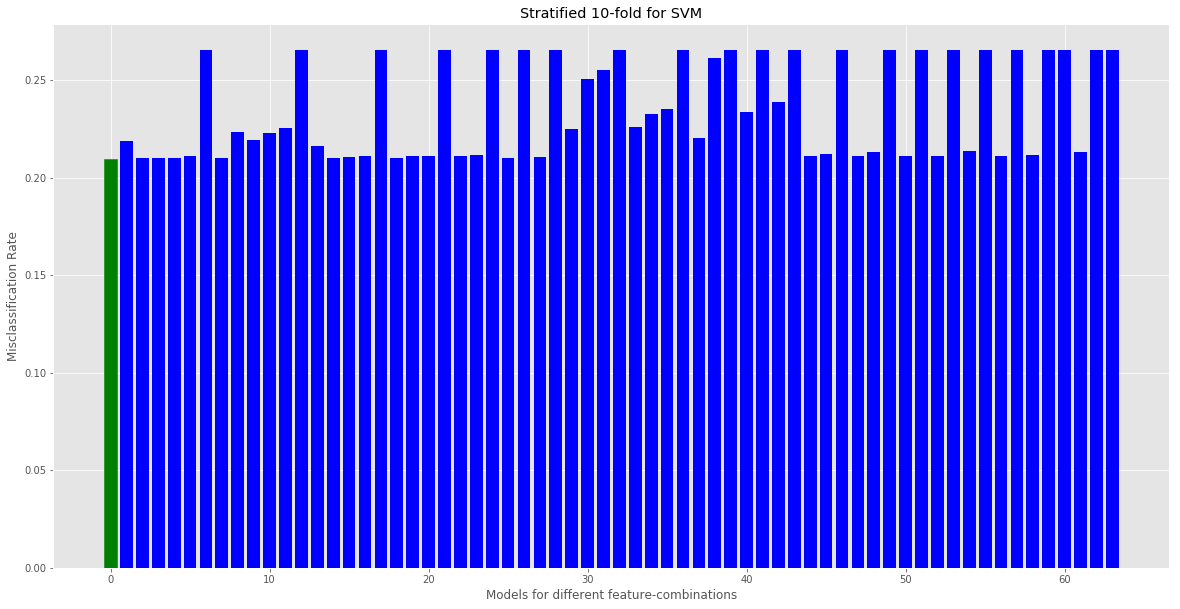

In [42]:

accuracy = store_kfold_svm

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified 10-fold for SVM')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_k_svm.png')
plt.show()



In [43]:
store_kfold_lgr = []

In [44]:
#Kfold stratified for Logistic Regression


for i in range(7):
     for item in possible_features_comb[i]:
            X = columns_
            
            kf = StratifiedKFold(n_splits=10)
            err = np.empty(10)
            for k, (train, test) in enumerate(kf.split(processed_data, y)):
                
                for j in range(i):
                    X = X.drop([item[j]], axis = 1)
                
                data_X_train = X.iloc[train]
                data_y_train = y.iloc[train]
                
                data_X_test = X.iloc[test]
                data_y_test = y.iloc[test]
                logreg = LogisticRegression()

                # fit model
                logreg.fit(data_X_train, data_y_train)
                label = logreg.predict(data_X_test)
                
                err[k] = 1-metrics.accuracy_score(data_y_test, label)
                X = columns_
                
            store_kfold_lgr.append(np.average(err))
            
            
print(store_kfold_lgr)

[0.204742582218786, 0.2192257848490351, 0.20573508590795822, 0.20530955571269122, 0.20715635097074067, 0.2053141926857632, 0.2229171573334507, 0.20502748135236937, 0.2213560631281796, 0.22035973011721893, 0.22362617513548363, 0.22362758666230106, 0.2291653474264756, 0.22277389954216664, 0.2092854180595642, 0.2132626965189255, 0.21255387676055365, 0.2266087267151097, 0.2075820820757131, 0.20885988729108834, 0.20616364178619215, 0.225615014128452, 0.20545099729170277, 0.21170180895544838, 0.23441901785476812, 0.21027953991734788, 0.23072905976321428, 0.20815268570132792, 0.23924634413121257, 0.22036153945098516, 0.22462109432679137, 0.2260397355260177, 0.23186380580417537, 0.21723976776328396, 0.2243368053740394, 0.2266093317370613, 0.22703547096674198, 0.22149569078775405, 0.23541353809270946, 0.2354135369462917, 0.22220511442165977, 0.2371190944010793, 0.22405513397954607, 0.2375442199108913, 0.213828862934756, 0.2101387004942436, 0.22220672685818266, 0.20957152895667736, 0.21510807681

0.204742582218786


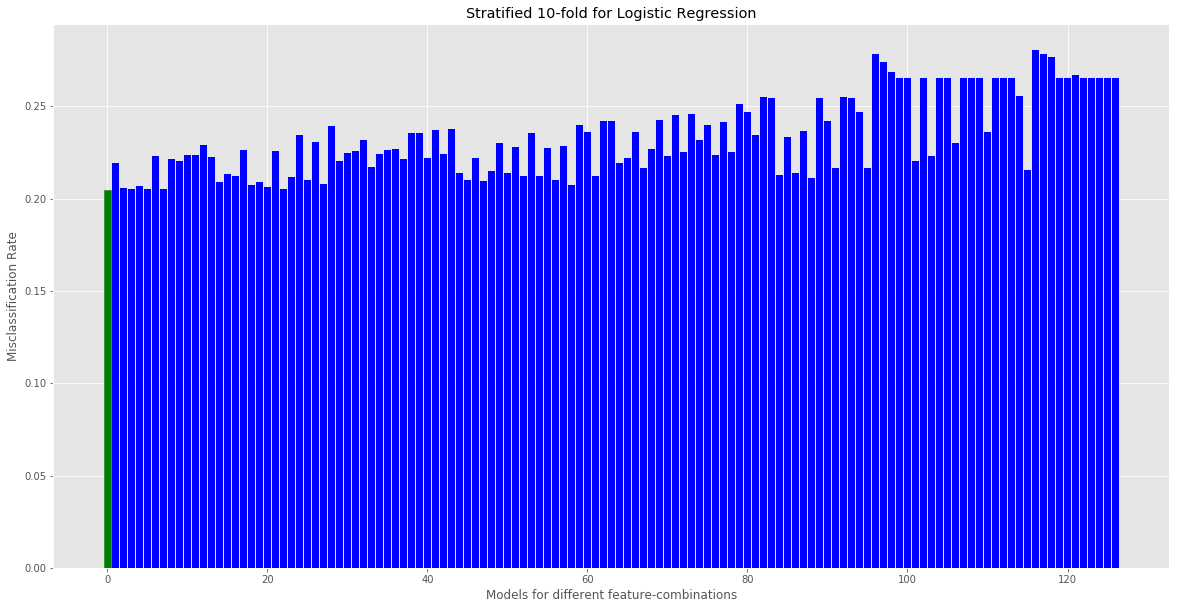

In [45]:

accuracy = store_kfold_lgr

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Stratified 10-fold for Logistic Regression')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_kfold_lgr.png')
plt.show()



In [46]:
store_bootstrap_n = []

In [47]:
#Bootstrap for K-neighbors



dat =  np.zeros(7043)

for i in range (7043):
    dat[i] = i
    
        
        
for i in range(7):
     for item in possible_features_comb[i]:
            X = columns_
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
            
            err = np.empty(10)
            # prepare bootstrap sample
            
            
            for j in range (10):
                boot = resample(dat, replace=True, n_samples=6000, random_state=1)
                # out of bag observations
                oob = [x for x in dat if x not in boot]
                
                data_X_train = X.iloc[boot]
                data_y_train = y.iloc[boot]
                
                data_X_test = X.iloc[oob]
                data_y_test = y.iloc[oob]
                
                
                neigh = KNeighborsClassifier(n_neighbors=3)
                
                neigh.fit(data_X_train, data_y_train)
                label = neigh.predict(data_X_test)
                err[j] = 1-metrics.accuracy_score(data_y_test, label)
                
                
            store_bootstrap_n.append(np.average(err))
    

            
                
print(store_bootstrap_n)      
            
           
         


                
            
            






[0.25265251989389925, 0.2688992042440318, 0.258289124668435, 0.25994694960212206, 0.2566312997347479, 0.25994694960212206, 0.28713527851458887, 0.2543103448275862, 0.27785145888594165, 0.2745358090185677, 0.28183023872679047, 0.2791777188328912, 0.24668435013262605, 0.2725464190981432, 0.26392572944297077, 0.26392572944297077, 0.2635941644562334, 0.2887931034482759, 0.26193633952254647, 0.26392572944297077, 0.26061007957559673, 0.29144562334217505, 0.2569628647214854, 0.26193633952254647, 0.2838196286472149, 0.2602785145888594, 0.2954244031830239, 0.26226790450928383, 0.2984084880636605, 0.26956233421750664, 0.2868037135278515, 0.276525198938992, 0.2602785145888594, 0.2755305039787799, 0.27884615384615385, 0.28050397877984085, 0.23441644562334218, 0.27818302387267907, 0.30736074270557034, 0.26425729442970824, 0.28050397877984085, 0.2669098143236074, 0.28116710875331563, 0.29608753315649866, 0.2705570291777189, 0.26226790450928383, 0.2858090185676393, 0.2612732095490716, 0.2645888594164

0.23143236074270562


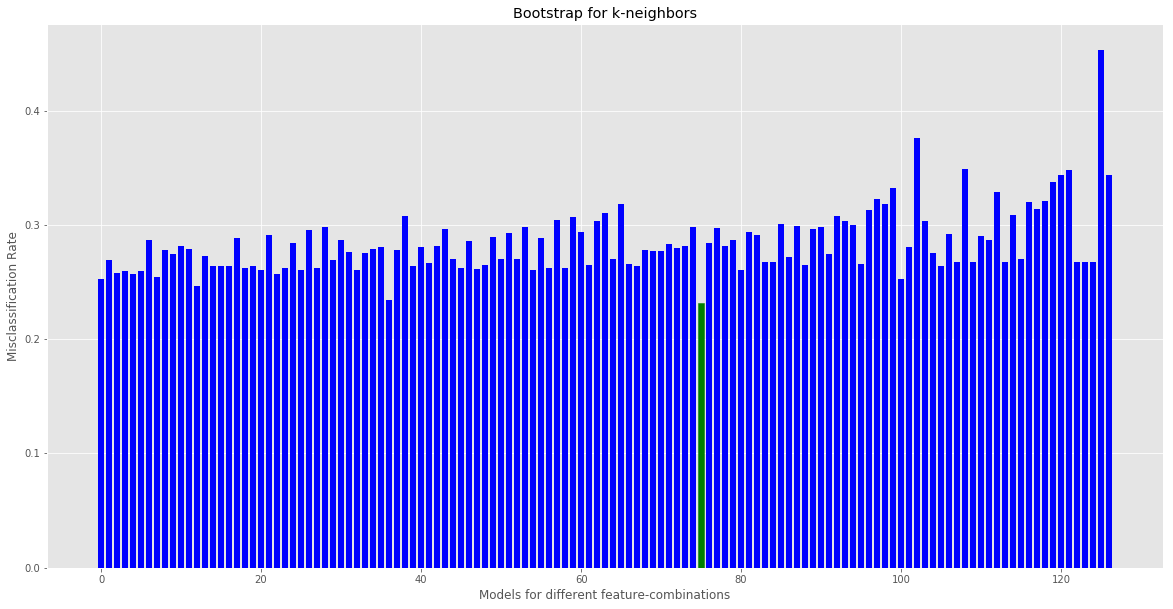

In [48]:

accuracy = store_bootstrap_n

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Bootstrap for k-neighbors')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_bootstrap_neigh.png')
plt.show()



In [49]:
store_bootstrap_svm = []

In [50]:
#Bootstrap for SVM



dat =  np.zeros(7043)

for i in range (7043):
    dat[i] = i
    
        
        
for i in range(4):
     for item in possible_features_comb[i]:
            X = columns_
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
            
            err = np.empty(10)
            # prepare bootstrap sample
            
            
            for j in range (10):
                boot = resample(dat, replace=True, n_samples=6000, random_state=1)
                # out of bag observations
                oob = [x for x in dat if x not in boot]
                
                data_X_train = X.iloc[boot]
                data_y_train = y.iloc[boot]
                
                data_X_test = X.iloc[oob]
                data_y_test = y.iloc[oob]
                
                
                SVMModel = svm.SVC(C=10, kernel='rbf', gamma=0.0001)
                
                SVMModel.fit(data_X_train, data_y_train)
                label = SVMModel.predict(data_X_test)
                err[j] = 1-metrics.accuracy_score(data_y_test, label)
                
                
            store_bootstrap_svm.append(np.average(err))
    

            
                
print(store_bootstrap_svm)      
            
           
         


                
            
            






[0.20557029177718836, 0.21551724137931041, 0.2068965517241379, 0.20722811671087538, 0.2092175066312998, 0.21021220159151185, 0.26724137931034486, 0.2065649867374005, 0.22612732095490715, 0.21916445623342176, 0.26724137931034486, 0.2433687002652521, 0.26724137931034486, 0.21883289124668437, 0.20623342175066317, 0.20988063660477452, 0.21319628647214853, 0.26724137931034486, 0.2068965517241379, 0.21087533156498672, 0.21385941644562334, 0.26724137931034486, 0.2092175066312998, 0.21220159151193627, 0.26724137931034486, 0.20988063660477452, 0.26724137931034486, 0.21054376657824933, 0.26724137931034486, 0.23275862068965517, 0.26724137931034486, 0.26724137931034486, 0.26724137931034486, 0.23375331564986732, 0.26724137931034486, 0.26724137931034486, 0.26724137931034486, 0.23242705570291777, 0.26724137931034486, 0.26724137931034486, 0.26724137931034486, 0.26724137931034486, 0.26724137931034486, 0.26724137931034486, 0.20988063660477452, 0.21319628647214853, 0.26724137931034486, 0.2098806366047745

0.20557029177718836


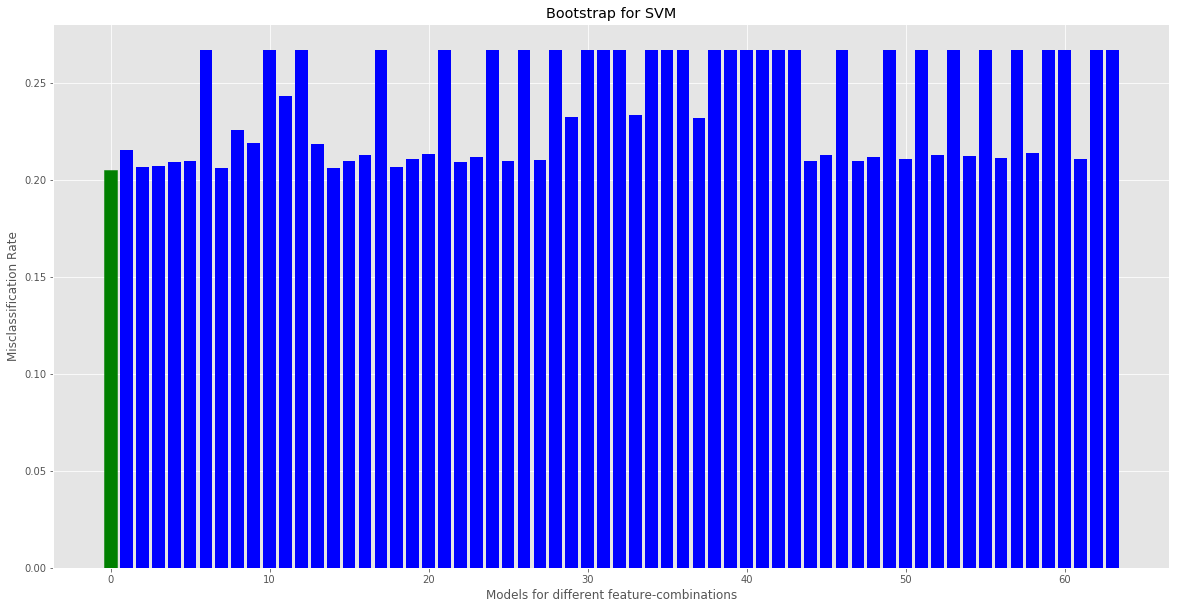

In [51]:

accuracy = store_bootstrap_svm

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Bootstrap for SVM')
plt.xlabel('Models for different feature-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_boot_svm.png')
plt.show()



In [5]:
 store_bootstrap_lgr = []

In [6]:
#Bootstrap for Logistic regression



dat =  np.zeros(7043)

for i in range (7043):
    dat[i] = i
    
        
        
for i in range(7):
     for item in possible_features_comb[i]:
            X = columns_
            for j in range(i):
                X = X.drop([item[j]], axis = 1)
            
            err = np.empty(25)
            # prepare bootstrap sample
            
            
            for j in range (25):
                boot = resample(dat, replace=True, n_samples=7043, random_state=1)
                # out of bag observations
                oob = [x for x in dat if x not in boot]
                
                data_X_train = X.iloc[boot]
                data_y_train = y.iloc[boot]
                
                data_X_test = X.iloc[oob]
                data_y_test = y.iloc[oob]
                
                
                
                
                
                logreg = LogisticRegression()

                # fit model
                logreg.fit(data_X_train, data_y_train)
                label = logreg.predict(data_X_test)
                err[j] = 1-metrics.accuracy_score(data_y_test, label)
                
                
            store_bootstrap_lgr.append(np.average(err))
    

            
                
print(store_bootstrap_lgr)      
            
           
         


                
            
            






[0.20759101471727348, 0.21804802478698682, 0.21030209140201392, 0.20797831138652215, 0.21417505809450044, 0.2095274980635167, 0.21998450813323, 0.20914020139426803, 0.22656855151045696, 0.22037180480247864, 0.2250193648334624, 0.22463206816421377, 0.22153369481022467, 0.2188226181254841, 0.2126258714175058, 0.21843532145623545, 0.2168861347792409, 0.22269558481797058, 0.2130131680867544, 0.2099147947327653, 0.21030209140201392, 0.22463206816421377, 0.20604182804027882, 0.2126258714175058, 0.22850503485670026, 0.20875290472501937, 0.22927962819519754, 0.2068164213787761, 0.23934934159566226, 0.2250193648334624, 0.22308288148721922, 0.22927962819519754, 0.23508907823392722, 0.2219209914794733, 0.22463206816421377, 0.22153369481022467, 0.22153369481022467, 0.22230828814872194, 0.23508907823392722, 0.2347017815646786, 0.22037180480247864, 0.2408985282726569, 0.22269558481797058, 0.23857474825716493, 0.21727343144848954, 0.2137877614252517, 0.22424477149496513, 0.21340046475600302, 0.214949

0.20565453137103018


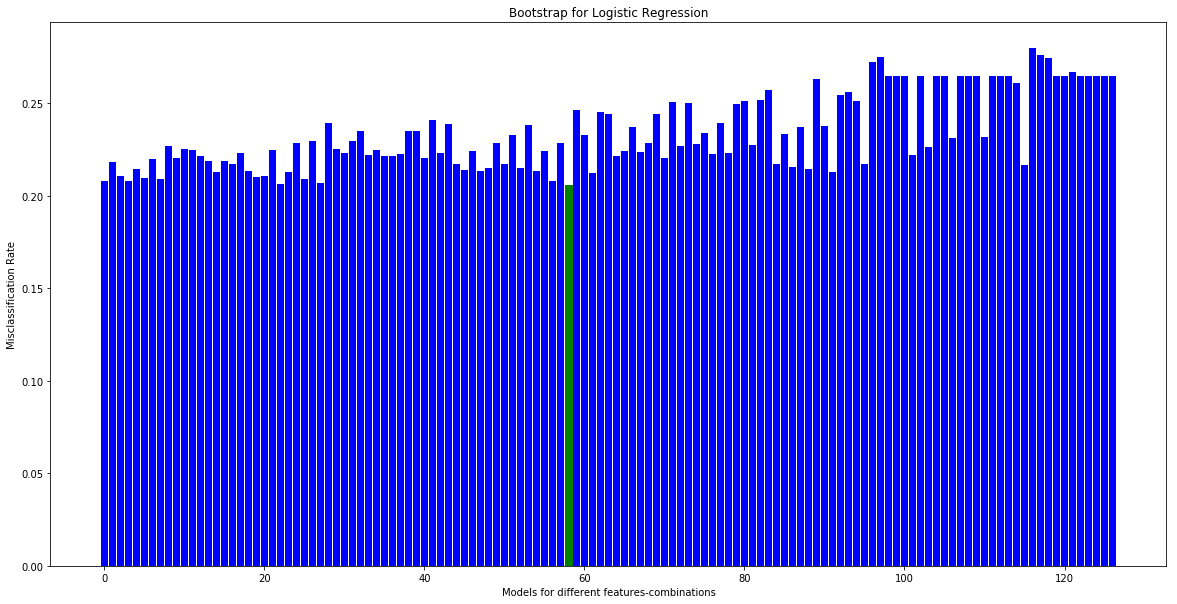

In [7]:

accuracy = store_bootstrap_lgr

%matplotlib inline
index_min = np.argmin(accuracy)
accuracy = np.array(accuracy)
accuracy.reshape(accuracy.shape[0],1)
plt.rcParams['figure.figsize'] = [20, 10]
plt.title('Bootstrap for Logistic Regression')
plt.xlabel('Models for different features-combinations')
plt.ylabel('Misclassification Rate')
bar_list = plt.bar(range(accuracy.shape[0]), accuracy, color='blue')
bar_list[index_min].set_color('g')
matplotlib.style.use('ggplot')
print(accuracy[index_min])
plt.savefig('Ass2_bootstrap_lgr.png')
plt.show()



In [12]:
final_model = LogisticRegression()
preff = processed_data[[    'MonthlyCharges',  'PaperlessBilling',  'OnlineBackup',  'TechSupport', 'tenure', 'Contract']]
data_X_train, data_X_test, data_y_train, data_y_test = train_test_split(preff , y, test_size = .4, stratify=processed_data['Churn'],random_state = 0)
final_model.fit(data_X_train, data_y_train)
label = final_model.predict(data_X_test)

filename = "Lgr_strat.sav"
pickle.dump(final_model, open(filename, 'wb'))
print(1-metrics.accuracy_score(data_y_test, label))

0.20440028388928322
